In [1]:
import time
import sys
import os
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(
    {
        "k1": ["one", "two"] * 3 + ["two"],
        "k2": [
            1,
            1,
            2,
            3,
            3,
            4,
            4,
        ],
    }
)
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [8]:
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [9]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [10]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [12]:
data = pd.Series([1.0, -999.0, 2.0, -999.0, -1000.0, 3.0])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [13]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [14]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [15]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [17]:
data = pd.DataFrame(
    np.arange(12).reshape((3, 4)),
    index=["Ohio", "Colorado", "New York"],
    columns=["one", "two", "three", "four"],
)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [18]:
def transform(x):
    return x[:4].upper()

In [ ]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [20]:
data.index = data.index.map(transform)

In [21]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [22]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [23]:
data.rename(index={"OHIO": "INDIANA"}, columns={"three": "peekaboo"})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [24]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

In [25]:
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [26]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [27]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [28]:
age_categories.categories[0]

Interval(18, 25, closed='right')

In [30]:
age_categories.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

In [31]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [33]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [41]:
data = np.random.uniform(size=20)
pd.cut(data, 4, precision=2)

[(0.24, 0.47], (0.71, 0.94], (0.71, 0.94], (0.47, 0.71], (-9.3e-05, 0.24], ..., (0.47, 0.71], (-9.3e-05, 0.24], (-9.3e-05, 0.24], (0.47, 0.71], (-9.3e-05, 0.24]]
Length: 20
Categories (4, interval[float64, right]): [(-9.3e-05, 0.24] < (0.24, 0.47] < (0.47, 0.71] < (0.71, 0.94]]

In [43]:
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)
quartiles

[(-3.0399999999999996, -0.63], (-3.0399999999999996, -0.63], (-0.63, 0.048], (0.65, 3.63], (-0.63, 0.048], ..., (0.048, 0.65], (-0.63, 0.048], (0.048, 0.65], (-3.0399999999999996, -0.63], (-0.63, 0.048]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.0399999999999996, -0.63] < (-0.63, 0.048] < (0.048, 0.65] < (0.65, 3.63]]

In [44]:
quartiles.value_counts()

(-3.0399999999999996, -0.63]    250
(-0.63, 0.048]                  250
(0.048, 0.65]                   250
(0.65, 3.63]                    250
Name: count, dtype: int64

In [46]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.0]).value_counts()

(-3.03, -1.212]     100
(-1.212, 0.0476]    400
(0.0476, 1.306]     400
(1.306, 3.63]       100
Name: count, dtype: int64

In [48]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.014909,-0.061500,-0.009128,0.003733
std,0.963741,1.010373,1.036921,0.979582
min,-2.804099,-3.902624,-3.519594,-2.858839
25%,-0.605751,-0.721651,-0.721906,-0.642052
50%,0.037177,-0.065421,-0.020904,-0.024759
75%,0.611334,0.629446,0.661736,0.653596
max,3.290550,3.623692,3.313507,3.231478


In [50]:
col = data[2]
col

0     -0.660324
1     -0.418313
2      1.271608
3      0.423253
4      0.245986
         ...   
995   -0.518514
996    1.096270
997    0.491791
998   -1.258938
999    0.843278
Name: 2, Length: 1000, dtype: float64

In [51]:
col[col.abs() > 3]

274   -3.081761
420   -3.519594
609    3.255167
672    3.313507
810    3.074232
903   -3.299467
933   -3.106390
Name: 2, dtype: float64

In [52]:
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
30,-1.665540,0.331070,-1.405561,3.130007
254,3.080355,-0.967491,1.527225,2.065253
261,3.093566,0.025239,0.062095,-0.774303
274,-0.393225,0.521300,-3.081761,-0.545144
372,-0.126036,-3.537763,-0.212096,0.253162
378,0.996530,1.154424,0.838107,3.231478
420,1.521624,1.007713,-3.519594,-0.189845
446,-0.524798,3.623692,0.378900,-0.699968
508,3.213233,-0.668938,-0.000480,0.863184
609,-1.267170,-0.346481,3.255167,-0.423811


In [54]:
data[data.abs() > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.014231,-0.060683,-0.008764,0.003277
std,0.961562,1.003525,1.031869,0.978143
min,-2.804099,-3.000000,-3.000000,-2.858839
25%,-0.605751,-0.721651,-0.721906,-0.642052
50%,0.037177,-0.065421,-0.020904,-0.024759
75%,0.611334,0.629446,0.661736,0.653596
max,3.000000,3.000000,3.000000,3.000000


In [56]:
np.sign(data).head()

,0,1,2,3
0,1.0,-1.0,-1.0,-1.0
1,-1.0,1.0,-1.0,1.0
2,-1.0,1.0,1.0,-1.0
3,1.0,-1.0,1.0,1.0
4,1.0,-1.0,1.0,-1.0


In [57]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [62]:
sampler = np.random.permutation(5)
sampler

array([2, 3, 0, 4, 1], dtype=int32)

In [66]:
df.take(sampler)

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13


In [67]:
df.iloc[sampler]

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13


In [68]:
column_sampler = np.random.permutation(7)
column_sampler

array([4, 1, 0, 5, 2, 6, 3], dtype=int32)

In [69]:
df.take(column_sampler, axis="columns")

,4,1,0,5,2,6,3
0,4,1,0,5,2,6,3
1,11,8,7,12,9,13,10
2,18,15,14,19,16,20,17
3,25,22,21,26,23,27,24
4,32,29,28,33,30,34,31


In [ ]:
df.sample(n=3)

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20


In [71]:
choices = pd.Series([5, 7, -1, 6, 4])
choices.sample(n=10, replace=True)

1    7
1    7
4    4
2   -1
0    5
2   -1
4    4
4    4
2   -1
4    4
dtype: int64

In [73]:
df = pd.DataFrame({"key": list("bbacab"), "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [76]:
pd.get_dummies(df["key"])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [77]:
dummies = pd.get_dummies(df["key"], prefix="key")
df_with_dummy = df[["data1"]].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,False,True,False
1,1,False,True,False
2,2,True,False,False
3,3,False,False,True
4,4,True,False,False
5,5,False,True,False


In [80]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    r"C:\Workspace\04_Study\01_AI\02_Kaggle\01_SamplesForKaggle\data\raw\pydata\datasets\movielens\movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [83]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [82]:
dummies = movies["genres"].str.get_dummies("|")
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [84]:
movies_windic = movies.join(dummies.add_prefix("Genre_"))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [86]:
np.random.seed(12345)
values = np.random.uniform(size=10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [87]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,False,False,False,False,True
1,False,True,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,False,True
7,False,False,False,True,False
8,False,False,False,True,False
9,False,False,False,True,False


In [88]:
s = pd.Series([1, 2, 3, None])
s

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [89]:
s.dtype

dtype('float64')

In [90]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [91]:
s.isna()

0    False
1    False
2    False
3     True
dtype: bool

In [92]:
s[3] is pd.NA

True

In [93]:
s[3] is np.nan

False

In [94]:
pd.isna(s[3])

True

In [95]:
s = pd.Series(["one", "two", None, "three"], dtype=pd.StringDtype())
s

0      one
1      two
2     <NA>
3    three
dtype: string

In [96]:
df = pd.DataFrame(
    {
        "A": [1, 2, None, 4],
        "B": ["one", "two", "three", None],
        "C": [False, None, False, True],
    }
)
df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [97]:
df.dtypes

A    float64
B     object
C     object
dtype: object

In [98]:
df["A"] = df["A"].astype("Int64")
df["B"] = df["B"].astype("string")
df["C"] = df["C"].astype("boolean")
df.dtypes

A             Int64
B    string[python]
C           boolean
dtype: object

In [99]:
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


In [100]:
val = "a,b,  guido"
val.split(",")

['a', 'b', '  guido']

In [101]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [103]:
first, second, third = pieces
first + "::" + second + "::" + third

'a::b::guido'

In [104]:
"::".join(pieces)

'a::b::guido'

In [105]:
"guido" in val

True

In [106]:
val.index(",")

1

In [107]:
val.find(":")

-1

In [ ]:
# val.index(":")

ValueError: substring not found

In [109]:
val.count(",")

2

In [110]:
val.replace(",", "::")

'a::b::  guido'

In [111]:
val.replace(",", "")

'ab  guido'

In [112]:
import re

text = "foo    bar\t baz  \tqux"
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

In [113]:
regex = re.compile(r"\s+")
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [114]:
regex.findall(text)

['    ', '\t ', '  \t']

In [115]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"
regex = re.compile(pattern, flags=re.IGNORECASE)

In [116]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [118]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [119]:
text[m.start() : m.end()]

'dave@google.com'

In [120]:
print(regex.match(text))

None


In [121]:
print(regex.sub("REDACTED", text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


In [126]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
regex = re.compile(pattern=pattern, flags=re.IGNORECASE)
m = regex.match("wesm@bright.net")
m.groups()

('wesm', 'bright', 'net')

In [127]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [128]:
print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com


In [130]:
data = {
    "Dave": "dave@google.com",
    "Steve": "steve@gmail.com",
    "Rob": "rob@gmail.com",
    "Wes": np.nan,
}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [131]:
data.isna()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [132]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [135]:
data_as_string_ext = data.astype("string")
data_as_string_ext

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [138]:
data_as_string_ext.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes       <NA>
dtype: boolean

In [147]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [141]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]
matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [142]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

In [148]:
values = pd.Series(["apple", "orange", "apple", "apple"] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [149]:
values.unique()

array(['apple', 'orange'], dtype=object)

In [150]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(["apple", "orange"])
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [151]:
dim

0     apple
1    orange
dtype: object

In [152]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [ ]:
fruits = ["apple", "orange", "apple", "apple"] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame(
    {
        "fruit": fruits,
        "basket_id": np.arange(N),
        "count": rng.integers(3, 15, size=N),
        "weight": rng.uniform(0, 4, size=N),
    },
    columns=["basket_id", "fruit", "count", "weight"],
)
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [156]:
fruit_cat = df["fruit"].astype("category")
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [158]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [159]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [160]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [161]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

In [163]:
df["fruit"] = df["fruit"].astype("category")
df["fruit"]

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [164]:
my_categories = pd.Categorical(["foo", "bar", "baz", "foo", "bar"])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [165]:
categories = ["foo", "bar", "baz"]
codes = [0, 1, 2, 0, 0, 1]

In [167]:
my_cats_2 = pd.Categorical.from_codes(codes, categories=categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [168]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [169]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [170]:
rng = np.random.default_rng(seed=12345)
draws = rng.standard_normal(1000)
draws[:5]

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331])

In [171]:
bins = pd.qcut(draws, 4)
bins

[(-3.121, -0.675], (0.687, 3.211], (-3.121, -0.675], (-0.675, 0.0134], (-0.675, 0.0134], ..., (0.0134, 0.687], (0.0134, 0.687], (-0.675, 0.0134], (0.0134, 0.687], (-0.675, 0.0134]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.121, -0.675] < (-0.675, 0.0134] < (0.0134, 0.687] < (0.687, 3.211]]

In [172]:
bins = pd.qcut(draws, 4, labels=["Q1", "Q2", "Q3", "Q4"])
bins

['Q1', 'Q4', 'Q1', 'Q2', 'Q2', ..., 'Q3', 'Q3', 'Q2', 'Q3', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [173]:
bins.codes[:10]

array([0, 3, 0, 1, 1, 0, 0, 2, 2, 0], dtype=int8)

In [175]:
bins = pd.Series(bins, name="quartiles")
result = pd.Series(draws).groupby(bins).agg(["count", "min", "max"]).reset_index()
result

C:\Users\mun03\AppData\Local\Temp\ipykernel_23792\3621709687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = pd.Series(draws).groupby(bins).agg(["count", "min", "max"]).reset_index()


,quartiles,count,min,max
0,Q1,250,-3.119609,-0.678494
1,Q2,250,-0.673305,0.008009
2,Q3,250,0.018753,0.686183
3,Q4,250,0.688282,3.211418


In [177]:
result["quartiles"]

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartiles, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [180]:
N = 10_000_000
labels = pd.Series(["foo", "bar", "baz", "qux"] * (N // 4))
categories = labels.astype("category")

In [181]:
labels.memory_usage(deep=True)

520000132

In [182]:
categories.memory_usage(deep=True)

10000512

In [184]:
%time _ = labels.astype('category')

CPU times: total: 297 ms
Wall time: 292 ms


In [185]:
%timeit labels.value_counts()

233 ms ± 8.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [186]:
%timeit categories.value_counts()

31.8 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [187]:
s = pd.Series(["a", "b", "c", "d"] * 2)
cat_s = s.astype("category")
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [188]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [190]:
actual_categories = list("abcde")
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [191]:
cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [192]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

In [193]:
cat_s3 = cat_s[cat_s.isin(["a", "b"])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [194]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

In [195]:
cat_s = pd.Series(list("abcd" * 2), dtype="category")
pd.get_dummies(cat_s)

,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True


In [ ]:
data = pd.Series(
    np.random.uniform(size=9), index=[list("aaabbccdd"), [1, 2, 3, 1, 3, 1, 2, 2, 3]]
)
data #256

a  1    0.723685
   2    0.642475
   3    0.717454
b  1    0.467599
   3    0.325585
c  1    0.439645
   2    0.729689
d  2    0.994015
   3    0.676874
dtype: float64

In [198]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [199]:
data["b"]

1    0.467599
3    0.325585
dtype: float64

In [200]:
data["b":"c"]

b  1    0.467599
   3    0.325585
c  1    0.439645
   2    0.729689
dtype: float64

In [201]:
data.loc[["b", "d"]]

b  1    0.467599
   3    0.325585
d  2    0.994015
   3    0.676874
dtype: float64

In [202]:
data.loc[:, 2]

a    0.642475
c    0.729689
d    0.994015
dtype: float64

In [203]:
data.unstack()

,1,2,3
a,0.723685,0.642475,0.717454
b,0.467599,NaN,0.325585
c,0.439645,0.729689,NaN
d,NaN,0.994015,0.676874


In [204]:
data.unstack().stack()

a  1    0.723685
   2    0.642475
   3    0.717454
b  1    0.467599
   3    0.325585
c  1    0.439645
   2    0.729689
d  2    0.994015
   3    0.676874
dtype: float64

In [206]:
frame = pd.DataFrame(
    np.arange(12).reshape(
        (
            4,
            3,
        )
    ),
    index=[list("aabb"), [1, 2, 1, 2]],
    columns=[["Ohio", "Ohio", "Colorado"], ["Green", "Red", "Green"]],
)
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [208]:
frame.index.names = ["k1", "k2"]
frame

Ohio     Colorado
      Green Red    Green
k1 k2                   
a  1      0   1        2
   2      3   4        5
b  1      6   7        8
   2      9  10       11

In [210]:
frame.columns.names = ["state", "color"]
frame

state  Ohio     Colorado
color Green Red    Green
k1 k2                   
a  1      0   1        2
   2      3   4        5
b  1      6   7        8
   2      9  10       11

In [211]:
frame.index.nlevels

2

In [212]:
frame["Ohio"]

color  Green  Red
k1 k2            
a  1       0    1
   2       3    4
b  1       6    7
   2       9   10

In [213]:
frame.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['k1', 'k2'])

In [215]:
frame.swaplevel("k1", "k2")

state  Ohio     Colorado
color Green Red    Green
k2 k1                   
1  a      0   1        2
2  a      3   4        5
1  b      6   7        8
2  b      9  10       11

In [216]:
frame.sort_index(level=1)

state  Ohio     Colorado
color Green Red    Green
k1 k2                   
a  1      0   1        2
b  1      6   7        8
a  2      3   4        5
b  2      9  10       11

In [217]:
frame.swaplevel(0, 1).sort_index(level=0)

state  Ohio     Colorado
color Green Red    Green
k2 k1                   
1  a      0   1        2
   b      6   7        8
2  a      3   4        5
   b      9  10       11

In [218]:
frame.groupby(level="k2").sum()

state  Ohio     Colorado
color Green Red    Green
k2                      
1         6   8       10
2        12  14       16

In [220]:
frame.T.groupby(level="color").sum()

k1     a      b    
k2     1  2   1   2
color              
Green  2  8  14  20
Red    1  4   7  10

In [221]:
frame = pd.DataFrame(
    {
        "a": range(7),
        "b": range(7, 0, -1),
        "c": ["one", "one", "one", "two", "two", "two", "two"],
        "d": [0, 1, 2, 0, 1, 2, 3],
    }
)
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [222]:
frame2 = frame.set_index(["c", "d"])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [223]:
frame.set_index(["c", "d"], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [225]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [227]:
df1 = pd.DataFrame(
    {"key": list("bbacaab"), "data1": pd.Series(range(7), dtype="Int64")}
)
df2 = pd.DataFrame({"key": list("abd"), "data2": pd.Series(range(3), dtype="Int64")})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [228]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [229]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [230]:
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [231]:
df3 = pd.DataFrame(
    {"lkey": list("bbacaab"), "data1": pd.Series(range(7), dtype="Int64")}
)
df4 = pd.DataFrame({"rkey": list("abd"), "data2": pd.Series(range(3), dtype="Int64")})

In [237]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [238]:
pd.merge(df1, df2, how="outer")

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


In [239]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey", how="outer")

,lkey,data1,rkey,data2
0,a,2,a,0
1,a,4,a,0
2,a,5,a,0
3,b,0,b,1
4,b,1,b,1
5,b,6,b,1
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [247]:
df1 = pd.DataFrame({"key": list("bbacab"), "data1": pd.Series(range(6), dtype="Int64")})
df2 = pd.DataFrame({"key": list("ababd"), "data2": pd.Series(range(5), dtype="Int64")})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [248]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [249]:
pd.merge(df1, df2, how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,a,4,0
7,a,4,2
8,b,5,1
9,b,5,3


In [250]:
pd.merge(df1, df2, on="key", how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [251]:
pd.merge(df1, df2, how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,a,4,0
7,a,4,2
8,b,5,1
9,b,5,3


In [259]:
left = pd.DataFrame(
    {
        "key1": ["foo", "foo", "bar"],
        "key2": ["one", "two", "one"],
        "lval": pd.Series(range(3), dtype="Int64"),
    }
)
right = pd.DataFrame(
    {
        "key1": ["foo", "foo", "bar", "bar"],
        "key2": ["one", "two", "one", "two"],
        "rval": pd.Series(range(4, 8), dtype="Int64"),
    }
)

In [260]:
pd.merge(left, right, on=["key1", "key2"], how="outer")

,key1,key2,lval,rval
0,bar,one,2,6
1,bar,two,<NA>,7
2,foo,one,0,4
3,foo,two,1,5


In [261]:
pd.merge(left, right, on="key1")

,key1,key2_x,lval,key2_y,rval
0,foo,one,0,one,4
1,foo,one,0,two,5
2,foo,two,1,one,4
3,foo,two,1,two,5
4,bar,one,2,one,6
5,bar,one,2,two,7


In [262]:
pd.merge(left, right, on="key1", suffixes=["_left", "_right"])

,key1,key2_left,lval,key2_right,rval
0,foo,one,0,one,4
1,foo,one,0,two,5
2,foo,two,1,one,4
3,foo,two,1,two,5
4,bar,one,2,one,6
5,bar,one,2,two,7


In [264]:
left1 = pd.DataFrame(
    {"key": list("abaabc"), "value": pd.Series(range(6), dtype="Int64")}
)
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [265]:
right1

,group_val
a,3.5
b,7.0


In [266]:
pd.merge(left1, right1, left_on="key", right_index=True)

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0


In [267]:
pd.merge(left1, right1, left_on="key", right_index=True, how="outer")

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [271]:
lefth = pd.DataFrame(
    {
        "key1": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
        "key2": [2000, 2001, 2002, 2001, 2002],
        "data": pd.Series(range(5), dtype="Int64"),
    }
)
right_index = pd.MultiIndex.from_arrays(
    [
        ["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
        [2001, 2000, 2000, 2000, 2001, 2002],
    ]
)
righth = pd.DataFrame(
    {
        "event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64", index=right_index),
        "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64", index=right_index),
    }
)
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [272]:
lefth

,key1,key2,data
0,Ohio,2000,0
1,Ohio,2001,1
2,Ohio,2002,2
3,Nevada,2001,3
4,Nevada,2002,4


In [273]:
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [274]:
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True, how="outer")

,key1,key2,data,event1,event2
4,Nevada,2000,<NA>,2,3
3,Nevada,2001,3,0,1
4,Nevada,2002,4,<NA>,<NA>
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11


In [277]:
left2 = pd.DataFrame(
    [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]],
    index=["a", "c", "e"],
    columns=["Ohio", "Nevada"],
).astype("Int64")

right2 = pd.DataFrame(
    [[7.0, 8.0], [9.0, 10.0], [11.0, 12.0], [13.0, 14.0]],
    index=["b", "c", "d", "e"],
    columns=["Missouri", "Alabama"],
).astype("Int64")
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [278]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [281]:
pd.merge(left2, right2, how="outer", left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [282]:
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [283]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [290]:
another = pd.DataFrame(
    [[7.0, 8.0], [9.0, 10.0], [11.0, 12.0], [16.0, 17.0]],
    index=["a", "c", "e", "f"],
    columns=["New York", "Oregon"],
).astype("Int64")
another

,New York,Oregon
a,7,8
c,9,10
e,11,12
f,16,17


In [291]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7,8
c,3,4,9,10,9,10
e,5,6,13,14,11,12


In [292]:
left2.join([right2, another], how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7,8
c,3,4,9,10,9,10
e,5,6,13,14,11,12
b,<NA>,<NA>,7,8,<NA>,<NA>
d,<NA>,<NA>,11,12,<NA>,<NA>
f,<NA>,<NA>,<NA>,<NA>,16,17


In [293]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [294]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [295]:
np.concatenate([arr, arr])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [299]:
df1 = pd.DataFrame(arr, index=list("abc"))
df2 = pd.DataFrame(arr, index=list("efg"))
pd.concat([df1, df2])

,0,1,2,3
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
e,0,1,2,3
f,4,5,6,7
g,8,9,10,11


In [308]:
df3 = pd.DataFrame(arr, columns=list("ABCD"))
df4 = pd.DataFrame(arr, columns=list("FGHD"))
pd.concat([df3, df4], axis="columns")

,A,B,C,D,F,G,H,D
0,0,1,2,3,0,1,2,3
1,4,5,6,7,4,5,6,7
2,8,9,10,11,8,9,10,11


In [309]:
pd.merge(df3, df4, how="outer")

,A,B,C,D,F,G,H
0,0,1,2,3,0,1,2
1,4,5,6,7,4,5,6
2,8,9,10,11,8,9,10


In [ ]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2), index=["a", "b", "c"], columns=["one", "two"]
)
df2 = pd.DataFrame(
    np.arange(4).reshape(2, 2), index=["a", "c"], columns=["three", "four"]
)

In [312]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [313]:
df2

,three,four
a,0,1
c,2,3


In [314]:
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"])

level1     level2     
     one two  three four
a      0   1    0.0  1.0
b      2   3    NaN  NaN
c      4   5    2.0  3.0

In [315]:
pd.concat(
    [df1, df2], axis="columns", keys=["level1", "level2"], names=["upper", "lower"]
)

upper level1     level2     
lower    one two  three four
a          0   1    0.0  1.0
b          2   3    NaN  NaN
c          4   5    2.0  3.0

In [316]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)), columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.random.standard_normal((2, 3)), columns=["b", "d", "a"])

In [317]:
df1

,a,b,c,d
0,-0.539741,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614,0.523772
2,0.000940,1.343810,-0.713544,-0.831154


In [318]:
df2

,b,d,a
0,-2.370232,-1.860761,-0.860757
1,0.560145,-1.265934,0.119827


In [319]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.539741,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614,0.523772
2,0.000940,1.343810,-0.713544,-0.831154
3,-0.860757,-2.370232,NaN,-1.860761
4,0.119827,0.560145,NaN,-1.265934


In [ ]:
pd.concat([df1, df2], ignore_index=False)

,a,b,c,d
0,-0.539741,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614,0.523772
2,0.000940,1.343810,-0.713544,-0.831154
0,-0.860757,-2.370232,NaN,-1.860761
1,0.119827,0.560145,NaN,-1.265934


In [323]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan], index=list("fedcba"))
b = pd.Series([0.0, np.nan, 2.0, np.nan, np.nan, 5.0], index=list("abcdef"))

In [324]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [325]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [326]:
np.where(pd.isna(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [327]:
a.combine_first(b)

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [329]:
df1 = pd.DataFrame(
    {
        "a": [1.0, np.nan, 5.0, np.nan],
        "b": [np.nan, 2.0, np.nan, 6.0],
        "c": range(2, 18, 4),
    }
)
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [332]:
df2 = pd.DataFrame({"a": [5.0, 4.0, np.nan, 3.0, 7.0], "b": [np.nan, 3.0, 4, 6, 8]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [333]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [335]:
data = pd.DataFrame(
    np.arange(6).reshape(2, 3),
    index=pd.Index(["Ohio", "Colorado"], name="state"),
    columns=pd.Index(["one", "two", "three"], name="number"),
)
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [337]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [338]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [339]:
result.unstack(level=0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [340]:
result.unstack(level="state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [342]:
s1 = pd.Series([0, 1, 2, 3], index=list("abcd"), dtype="Int64")
s2 = pd.Series([4, 5, 6], index=list("cde"), dtype="Int64")
data2 = pd.concat([s1, s2], keys=["one", "two"])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [344]:
data2.unstack(level=0)

,one,two
a,0,<NA>
b,1,<NA>
c,2,4
d,3,5
e,<NA>,6


In [345]:
data2.unstack().stack(dropna=False)

C:\Users\mun03\AppData\Local\Temp\ipykernel_23792\3936770077.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data2.unstack().stack(dropna=False)


one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [350]:
df = pd.DataFrame(
    {"left": result, "right": result + 5},
    columns=pd.Index(["left", "right"], name="side"),
)
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [351]:
df.unstack(level="state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [353]:
def get_example_path(file_name):
    return (
        r"C:\Workspace\04_Study\01_AI\02_Kaggle\01_SamplesForKaggle\data\raw\pydata\examples\\"
        + file_name
    )

In [393]:
macro_data_path = get_example_path("macrodata.csv")
data = pd.read_csv(macro_data_path)
data = data.loc[:, ["year", "quarter", "realgdp", "infl", "unemp"]]
data

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2
...,...,...,...,...,...
198,2008,3,13324.600,-3.16,6.0
199,2008,4,13141.920,-8.79,6.9
200,2009,1,12925.410,0.94,8.1
201,2009,2,12901.504,3.37,9.2


In [394]:
periods = pd.PeriodIndex.from_fields(
    year=data["year"], quarter=data["quarter"], freq="Q"
).rename("date")

data = data.drop(columns=["year", "quarter"])

In [385]:
data

,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [395]:
data.index = periods.to_timestamp("D")
data.head()

,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [396]:
data = data.reindex(columns=["realgdp", "infl", "unemp"])
data.columns.name = "item"
data

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2
...,...,...,...
2008-07-01,13324.600,-3.16,6.0
2008-10-01,13141.920,-8.79,6.9
2009-01-01,12925.410,0.94,8.1


In [397]:
long_data = data.stack().reset_index().rename(columns={0: "value"})
long_data.head()

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340


In [398]:
pivoted = long_data.pivot(index="date", columns="item", values="value")
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [400]:
%matplotlib inline

In [401]:
import matplotlib.pyplot as plt

In [402]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

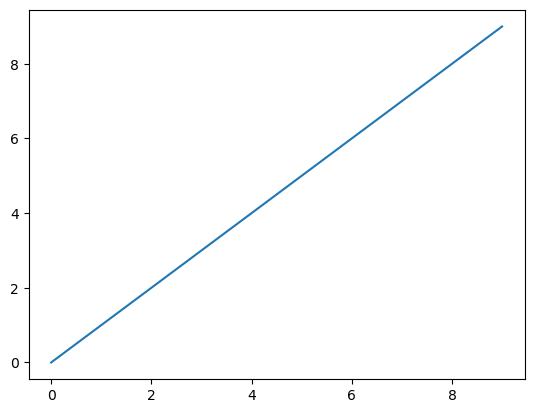

In [403]:
plt.plot(data)

In [404]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [405]:
ax1 = fig.add_subplot(2, 2, 1)

In [406]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

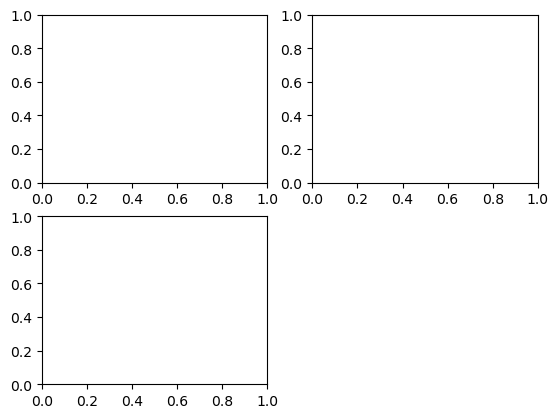

In [407]:
fig

In [419]:
ax3.plot(np.random.standard_normal(200).cumsum(), color="red", linestyle="dashed")
ax1.hist(np.random.standard_normal(200), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

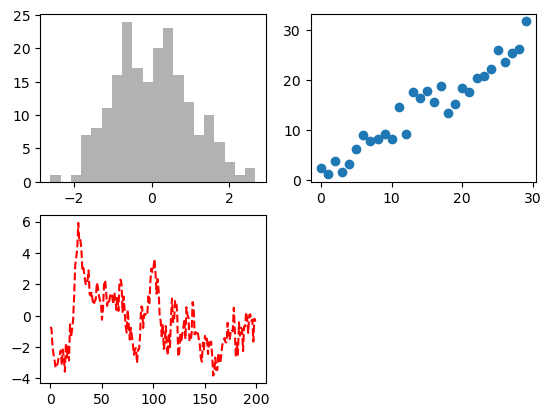

In [420]:
fig

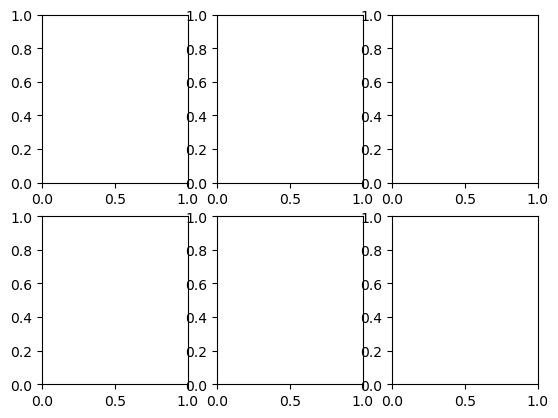

In [423]:
fig, axes = plt.subplots(2, 3)

In [424]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

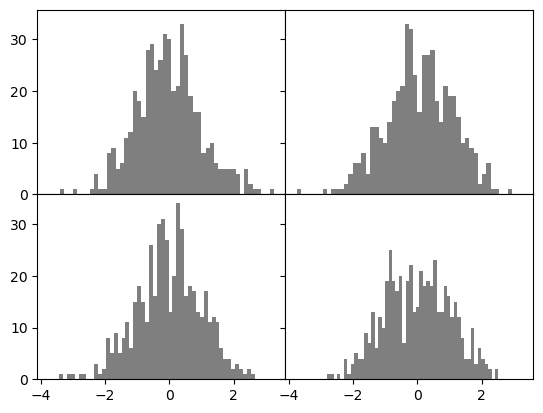

In [426]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )
fig.subplots_adjust(wspace=0, hspace=0)

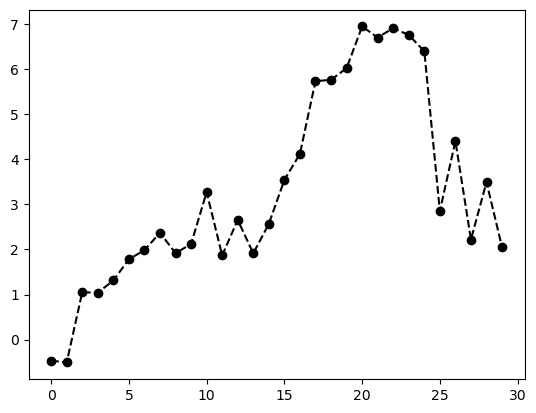

In [435]:
fig.clear()
ax = fig.add_subplot()
ax.plot(
    np.random.standard_normal(30).cumsum(),
    color="black",
    linestyle="dashed",
    marker="o",
)
fig

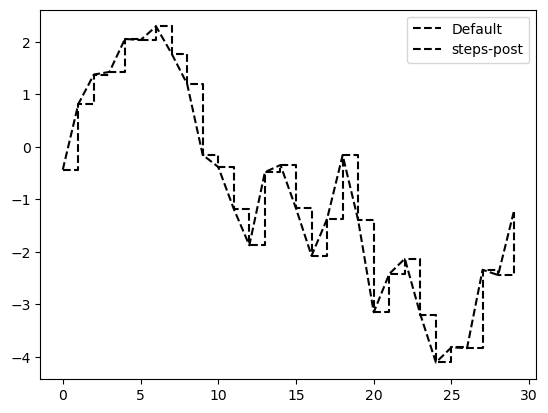

In [437]:
fig.clear()
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(
    data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post"
)
ax.legend()

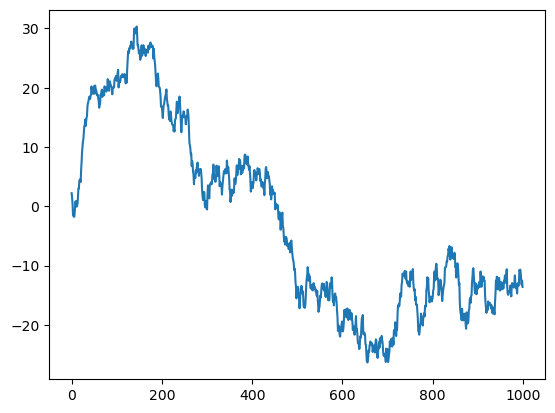

In [441]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

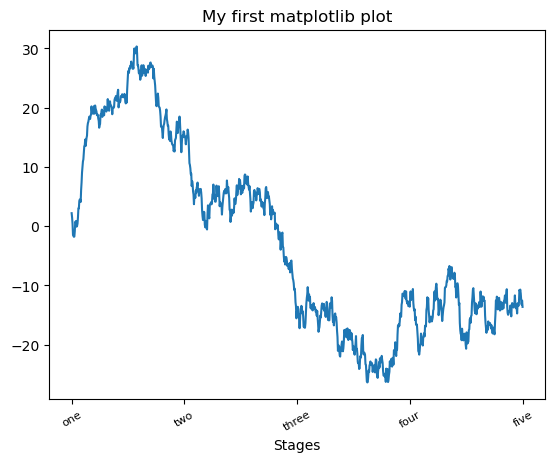

In [446]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")
fig

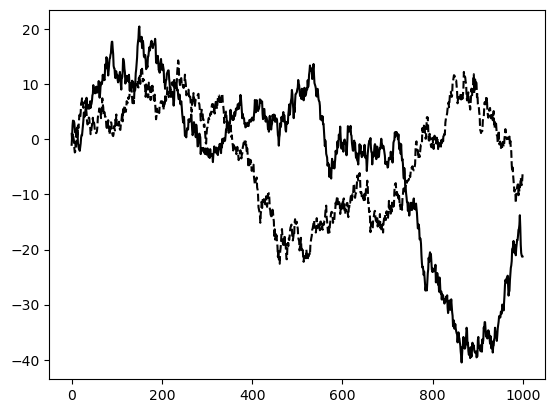

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", label="two", linestyle="dashed")

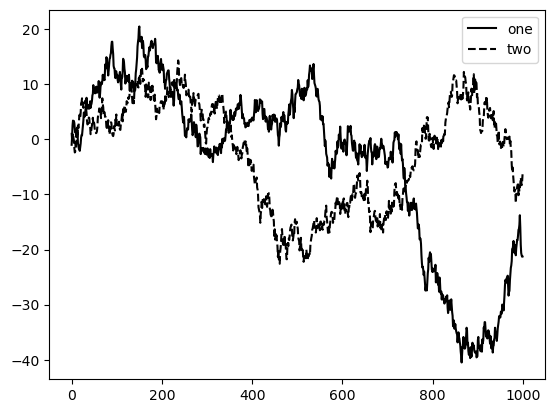

In [ ]:
ax.legend()
fig

In [449]:
from datetime import datetime

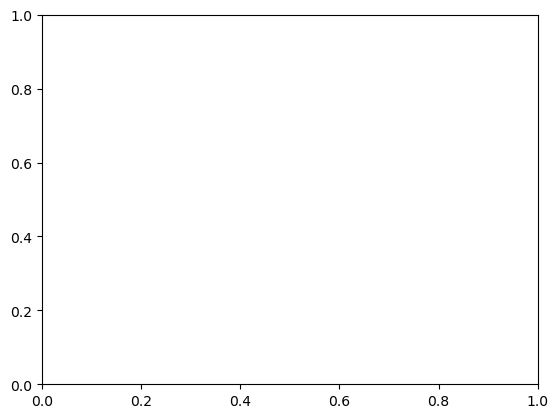

In [450]:
fig, ax = plt.subplots()

In [452]:
data = pd.read_csv(get_example_path("spx.csv"), index_col=0, parse_dates=True)
spx = data["SPX"]

In [454]:
spx.plot(ax=ax, color="black")

<Axes: xlabel='Date'>

In [459]:
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearn Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]

for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )

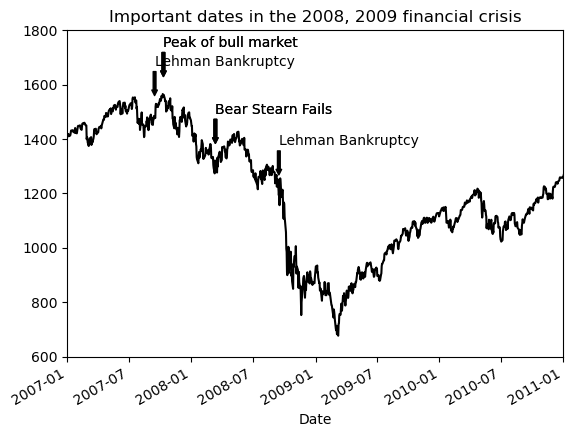

In [460]:
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008, 2009 financial crisis")
fig

In [ ]:
fig.savefig("figpath.svg")

In [ ]:
fig.savefig("figpath.png", dpi=400)

saved: page_15.png
